2025-03-31 14:10:35,411 - INFO - Loading dataset...
2025-03-31 14:10:35,425 - INFO - Loading trained model and preprocessor...
2025-03-31 14:10:35,547 - INFO - Mean Squared Error (MSE): 22.1755
2025-03-31 14:10:35,548 - INFO - R-squared (R²): 0.7373


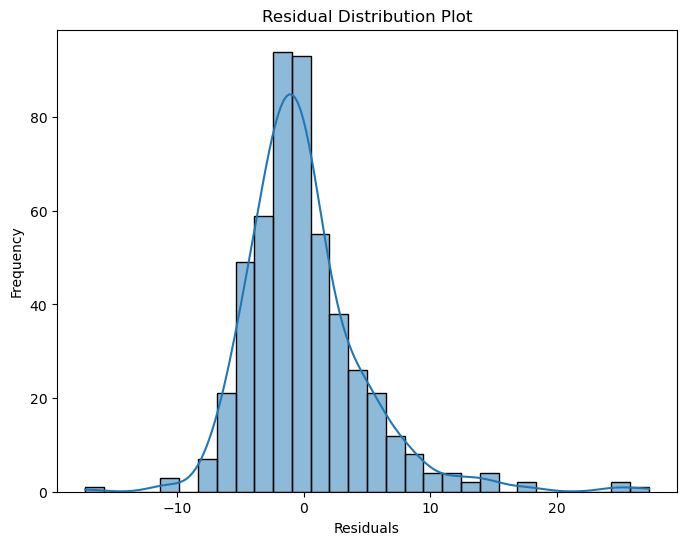

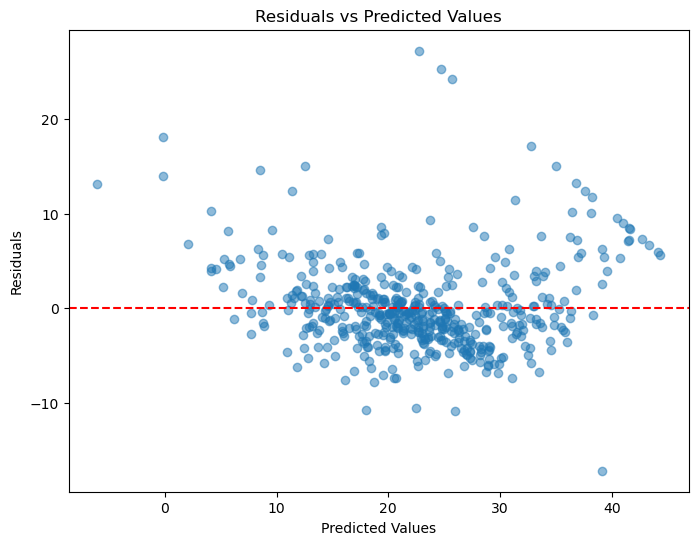

2025-03-31 14:10:35,983 - INFO - Model evaluation completed.


In [1]:
import os
import pandas as pd
import numpy as np
import joblib
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Setup logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Load dataset
logging.info("Loading dataset...")
df = pd.read_csv("../data/BostonHousing.csv")

# Identify categorical and numerical features
categorical_features = ['chas']
numerical_features = df.columns.difference(['medv', 'chas'])

# Load preprocessor and model
logging.info("Loading trained model and preprocessor...")
model = joblib.load("../models/linear_regression_model.pkl")
preprocessor = joblib.load("../models/preprocessor.pkl")

# Prepare feature and target variables
X = df.drop(columns=['medv'])
y = df['medv']
X_transformed = preprocessor.transform(X)

# Make predictions
y_pred = model.predict(X_transformed)

# Evaluate Model Performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

logging.info(f"Mean Squared Error (MSE): {mse:.4f}")
logging.info(f"R-squared (R²): {r2:.4f}")

# Plot Residuals
residuals = y - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

logging.info("Model evaluation completed.")
